# This section presents the implemention and the analysis of the KNN algorithm. 

## In the first part:
1. we import the necessary libraries and datasets, the handwritten digits dataset (Digits). This dataset contains images of handwritten samples of the numbers 0 to 9 and is a commonly used dataset for image classification.
2. we display the first few images. 

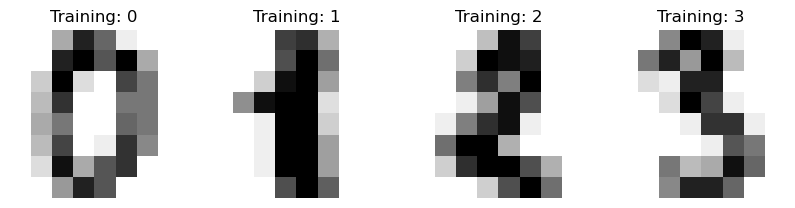

In [20]:
# Import necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()
data = pd.DataFrame(digits.data)
data['Target'] = digits.target

# Plotting the first few images of the dataset
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)



## In the second part:

1. we partition the dataset into the features, the image, and the target label, the 0-9.
2. we split the dataset into the training set and the test set.
3. we train a K-NN model on the training set. Here we set the neighbors to 3.


In [21]:
# Import libraries for K-NN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Select features and target variable
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-NN classifier model
model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training set
model.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=3)

## In the third part:
1. we use the trained model to make predictions on the test set.
2. we evaluate model performance by showing the whole classification report including accuracy, recall, precison, and F-1 score.
3. we use the confusion matrix to show how the model performs on three different categories. Here, we can observe that the accuracy is 95%.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



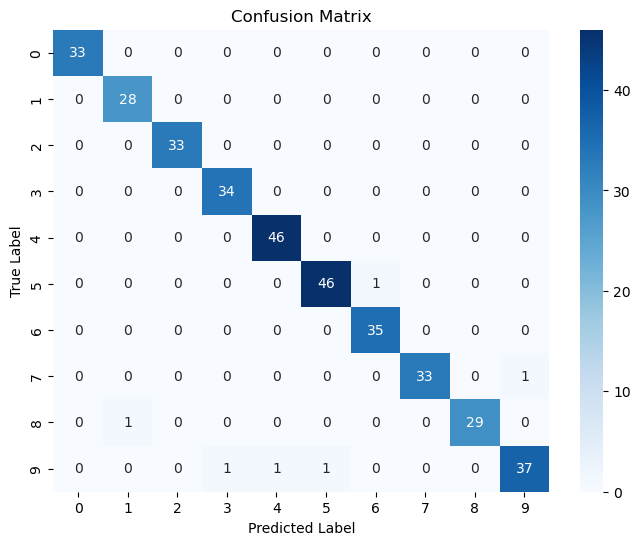

In [22]:
# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



## In the fourth part:
1. we further analyze the different implementation. For example, we control the parameter "n_neighbors" to determines the number of nearest neighbors used for voting. Increasing the number of neighbors generally increases the smoothness of the prediction, but may also cause the model to capture more noise. Besdies, we also control the "weights" as"distance", then the weight will be inversely proportional to distance.

2. we use the confusion matrix and classification report to evaluate the model's performance. 

3. we can observe that the accuracy is better.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



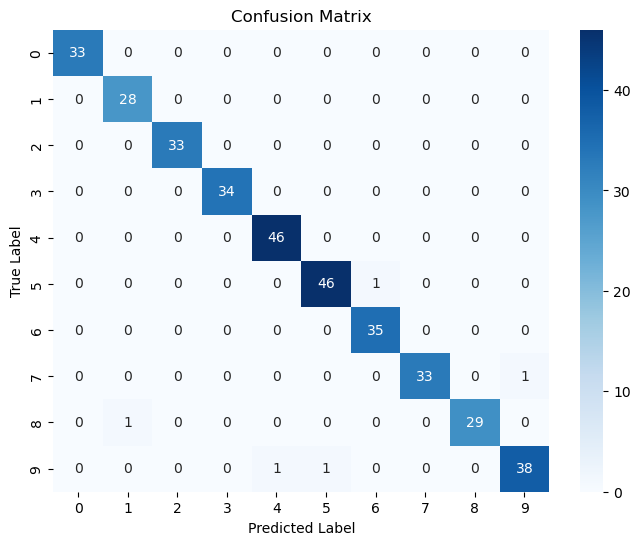

In [26]:
# Import libraries for K-NN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-NN classifier model, we set n_neighbors to 8 and set weights as distance
model = KNeighborsClassifier(n_neighbors=8, weights='distance')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()